In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('liver_disease.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Disease                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


1    416
0    167
Name: Disease, dtype: int64


<AxesSubplot:xlabel='Disease', ylabel='count'>

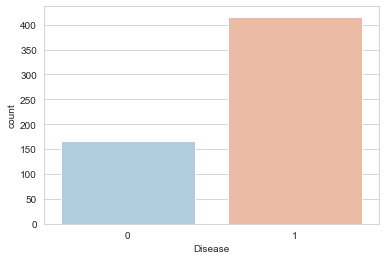

In [4]:
df['Disease']=df['Disease'].apply(lambda x: 0 if x==2 else 1)
print(df['Disease'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='Disease',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Disease', ylabel='count'>

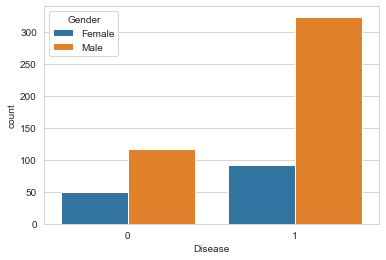

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Disease',hue='Gender',data=df)

In [6]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Female' else 0)

<AxesSubplot:>

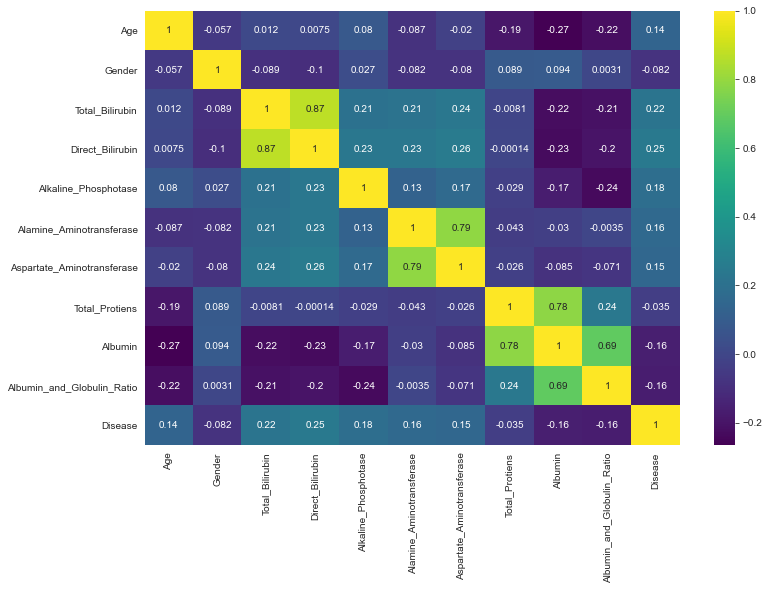

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [8]:
X=df.iloc[:, :-1]
y=df['Disease']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score
y_pred_rf=rf.predict(X_test)
score=accuracy_score(y_test, y_pred_rf)
print(score)

0.7521367521367521


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred_rf))
print('accuracy_score:',accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[12 18]
 [11 76]]
accuracy_score: 0.7521367521367521
              precision    recall  f1-score   support

           0       0.52      0.40      0.45        30
           1       0.81      0.87      0.84        87

    accuracy                           0.75       117
   macro avg       0.67      0.64      0.65       117
weighted avg       0.73      0.75      0.74       117



In [12]:
import pickle
pickle_out=open("liverdisease.pkl", "wb")
pickle.dump(rf, pickle_out)
pickle_out.close()